### Using ONE of the following sources, complete the questions for only that source. 
### Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29
### Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 
### Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since its not binary like the others, but if you really want to master these concepts, you should pick this one. 
### Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.    

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

aus_df=pd.read_csv('australian.dat',delimiter=' ',header=None)
aus_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [2]:
aus_df.columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
aus_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [81]:
aus_df['A15'].value_counts()

0    383
1    307
Name: A15, dtype: int64

#### 1. Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

Unnecessary preprocessing steps - Remove unnecessary columns (all are necessary), deal with null values (they were already replaced in the dataset prior to it's placing on the internet), encoding categorical data(also done by the file owner prior to release).

Create X and y values

In [3]:
X= aus_df.drop('A15', axis=1)
y=aus_df['A15']

Split the dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Necessary preprocessing step - standardize columns

In [5]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Visualize correlation

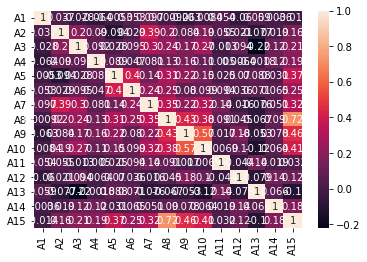

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

corrMatrix = aus_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### 2. Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

I used GridSearchCV to identify the best parameters to use when tuning my model. Because I entered so many search terms it took a really long time.  On this relatively small dataset this was an acceptable investment of time, but on a larger one choices would definitely have to be made.  These were returned as best {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}.

In [7]:
params_dt={'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[2,3,4,5,6,7,8,9,10,11,12], 'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12], 'min_weight_fraction_leaf':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_features':['log2', 'auto', 'sqrt']}

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [10]:
best_model = grid_dt.best_estimator_

y_pred_proba = grid_dt.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.796


In [11]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [58]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto', min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.0, splitter='best', random_state=63)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.855072463768116

In [34]:
predictions = dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        87
           1       0.79      0.82      0.81        51

    accuracy                           0.86       138
   macro avg       0.84      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138



#### 3. Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

I used GridSearchCV to identify the best parameters to use when tuning my model. Because I entered so many search terms it took a really long time. On this relatively small dataset this was an acceptable investment of time, but on a larger one choices would definitely have to be made. These were returned as best {'bootstrap': 'True','criterion': 'gini','max_depth': 5,'max_features': 'sqrt','min_samples_leaf': 5,'min_samples_split': 10,'n_estimators': 100}

In [45]:
params_rf={'n_estimators':[100, 200, 300, 400, 500], 'criterion':['gini', 'entropy'], 'bootstrap':['True', 'False'], 'max_depth':[3,5,7,9,11], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,3,5,7,9], 'max_features':['log2', 'auto', 'sqrt']}

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [47]:
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

Fitting 3 folds for each of 7500 candidates, totalling 22500 fits


{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [54]:
rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=10,
 n_estimators=100, random_state=63)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.855072463768116

In [49]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        87
           1       0.76      0.88      0.82        51

    accuracy                           0.86       138
   macro avg       0.84      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138



In [59]:
best_model = grid_rf.best_estimator_

y_pred_proba = grid_rf.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.914


#### 4. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

I used eval_set and eval_metric to identify the best way to tune the model.

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=5, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

[17:46:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8478260869565217

In [76]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time xg.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 257 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=5, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred_proba = xg.predict_proba(X_test)[:,1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.909


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [79]:
predictions = xg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        87
           1       0.74      0.90      0.81        51

    accuracy                           0.85       138
   macro avg       0.84      0.86      0.84       138
weighted avg       0.86      0.85      0.85       138



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


#### 5. Which model performed best? What is your performance metric? Why? 

Random Forest was the model that performed the best.  It performed marginally better than xgboost with a roc auc score of 0.914.  I used roc auc to evaluate performance because it is used to plot True Positive Rate against False Positive Rates and reflect the probability that a datapoint will be correctly classified at various threshholds. It is a better measure than just accuracy because the class sizes are not largely imbalanced